In [3]:
import numpy
import random
from PIL import Image
import pandas as pd
import numpy as np
import cv2
import math
import os
from hilbertcurve.hilbertcurve import HilbertCurve

In [141]:
files = []
max_size = 512*512
df = pd.read_csv('sizes.csv','r',delimiter=',')

x = []
y = []

for index,row in df.iterrows():
    files.append(row['name'])
    
print(len(files))        

3575


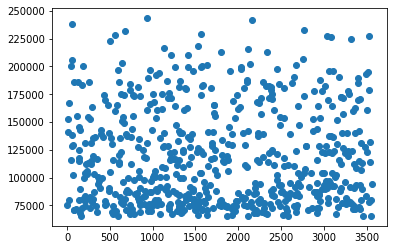

In [137]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [142]:
def create_image(name):
    df = pd.read_csv("decimal_files/" + name,sep='|',error_bad_lines=False,warn_bad_lines=False,engine='python')

    decimals = []
    for index, row in df.iterrows():
        values = row['bytes'].split('-')
        if row['type']=='data':
            values = [value+'d' for value in values]
        else:
            values = [value+'c' for value in values]
        decimals.extend(values)
    
    length = len(decimals)
    dimension = math.ceil(math.sqrt(length))
    bw_data = numpy.zeros((dimension, dimension), dtype=numpy.uint8)
    col_data = numpy.zeros((dimension, dimension, 3), dtype=numpy.uint8)
    
    for num in range(length):
        
        if decimals[num][-1]=='c':
            col = [0,255,0]
        else:
            col = [255,0,0]
        
        if (num//dimension%2==0):

            bw_data[num//dimension,num%dimension] = decimals[num][:-1]
            col_data[num//dimension,num%dimension] = col
        else:
            bw_data[num//dimension,dimension - num%dimension - 1]=decimals[num][:-1]
            col_data[num//dimension,dimension - num%dimension - 1]=col
            
    image = Image.fromarray(bw_data)
    image.save("images_varied/bw/"+name.strip('csv')+"png",quality=100)
    image = Image.fromarray(col_data)
    image.save("images_varied/col/"+name.strip('csv')+"png",quality=100)
 

In [143]:
for count,file in enumerate(files):
    create_image(file)
    if count%100==0:
        print(count)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


In [161]:
#resize images

path1 = '/Users/aizazansari/Desktop/Uni Data/MOMA/BinaryAnalysis/images_varied/bw/'
path2 = '/Users/aizazansari/Desktop/Uni Data/MOMA/BinaryAnalysis/images_varied/col/'

arr = os.listdir(path1)


for img in arr:
    if img.endswith('.png'):
        image1 = Image.open(path1+img)
        dim = pow(2,math.ceil(math.log(image1.size[0],2))) 
        ret_image1 = image1.resize([dim,dim], Image.NEAREST)
        ret_image1.save("images_varied/bw_up/"+ img,quality=100)

        image2 = Image.open(path2+img)
        ret_image2 = image2.resize([dim,dim], Image.NEAREST)
        ret_image2.save("images_varied/col_up/"+ img,quality=100)
        

8


In [164]:
def hc_coords(p, n,size):
    coords = []
    hilbert_curve = HilbertCurve(p, n)
    for i in range(size):
        coord = hilbert_curve.coordinates_from_distance(i)
        coords += [coord]
    return (coords)

In [165]:
def create_hilbert_image(name):
    
    bw_img = np.array(Image.open("images_varied/bw_up/"+name))
    col_img = np.array(Image.open("images_varied/col_up/"+name))
    
    dimension = bw_img.shape[0]
    coords = hc_dict[dimension]
 
    bw_data = numpy.zeros((dimension, dimension), dtype=numpy.uint8)
    col_data = numpy.zeros((dimension, dimension, 3), dtype=numpy.uint8)
    
    for num in range(dimension*dimension):
        if (num//dimension%2==0):
            bw_data[coords[num][0],coords[num][1]] = bw_img[num//dimension,num%dimension] 
            col_data[coords[num][0],coords[num][1]] = col_img[num//dimension,num%dimension] 
        else:
            bw_data[coords[num][0],coords[num][1]] = bw_img[num//dimension,dimension - num%dimension - 1]
            col_data[coords[num][0],coords[num][1]] = col_img[num//dimension,dimension - num%dimension - 1]
       
    image = Image.fromarray(bw_data)
    image.save("images_varied/bw_up_hilbert/"+name,quality=100)
    image = Image.fromarray(col_data)
    image.save("images_varied/col_up_hilbert/"+name,quality=100)

In [163]:
hc_dict = {8: hc_coords(3,2,8*8),
          16: hc_coords(4,2,16*16),
          32: hc_coords(5,2,32*32),
          64: hc_coords(6,2,64*64),
          128: hc_coords(7,2,128*128),
          256: hc_coords(8,2,256*256),
          512: hc_coords(9,2,512*512)
          }

In [166]:
#generate hilbert images
arr = os.listdir('/Users/aizazansari/Desktop/Uni Data/MOMA/BinaryAnalysis/images_varied/bw_up')
for count, name in enumerate(arr):
    if name.endswith('.png'):
        create_hilbert_image(name)   
    if count%100==0:
        print(count)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


In [167]:
color2index = {(0, 0, 0): 0,
 (0, 255, 0): 1,
 (255, 0, 0): 2}

In [170]:
def rgb_to_index(name):
    rgb_data = np.array(Image.open('images_varied/col_up_hilbert/'+name))
    dimension = rgb_data.shape[0]
    index_data = numpy.zeros((dimension, dimension), dtype=numpy.uint8)
    for i in range(dimension):
        for j in range(dimension):
            index_data[i][j] = color2index[tuple(rgb_data[i][j])]
    img = Image.fromarray(index_data)
    img.save('images_varied/col_up_hilbert_index/'+name)

In [171]:
#generate index images
path = '/Users/aizazansari/Desktop/Uni Data/MOMA/BinaryAnalysis/images_varied/col_up_hilbert'
arr = os.listdir(path)
for name in arr:
    if name.endswith('.png'):
        rgb_to_index(name)

In [122]:
p = 1
n = 2
length = 133*133
while (pow(2,(p*n))-1)<((length)-1):
        p = p + 1
coords = hc_coords(p,n,length)